In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from datetime import date
from datetime import datetime


In [2]:
user = pd.read_csv('users.csv')
receipt = pd.read_csv('receipts.csv')
receipt_item = pd.read_csv('receipt_items.csv')
brands = pd.read_csv('brands.csv')

# EDA (user table)

### gender hue by sign up source and platform

### Observations: 
#### By the counter, we can observe that the number of each gender is generated pretty evenly
#### And from the plot, we can see that female user prefer using facebook to sign up, whereas other user prefer Apple.

Counter({'prefer_not_to_say': 47, 'transgender': 41, 'female': 41, 'male': 35})


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

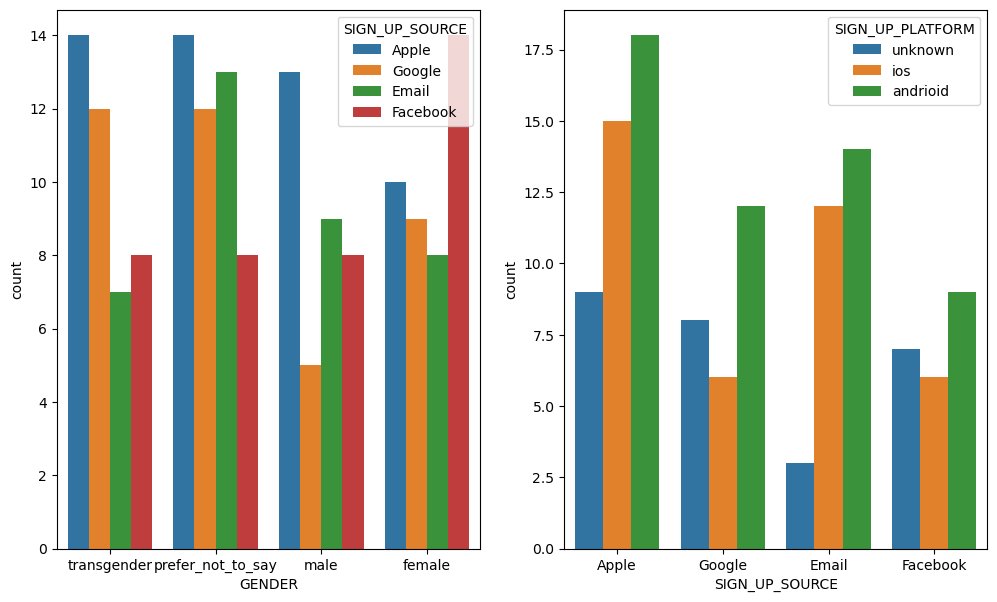

In [144]:
plt.figure(figsize = (12,7))

plt.subplot(1,2,1)
sns.countplot(data = user, x = 'GENDER', hue = 'SIGN_UP_SOURCE')
print(Counter(user['GENDER']))
plt.tight_layout

plt.subplot(1,2,2)
sns.countplot(data = user, x = 'SIGN_UP_SOURCE', hue = 'SIGN_UP_PLATFORM')
plt.tight_layout

### Differnt age category hue by source and platform
### The age category is from (https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age)

#### Observations:
#### Andriod users are more than other platform
#### Most user at adulthood category prefer using Apple to sign up, whereas user at middle adulthood prefer Facebook
#### From the pie chart and the other plot, we could say that users at adulthood and middle adulthood are much more than other other age group

In [138]:
user_age_focus = user.copy()
user_age_focus['BIRTH_DATE'] = user_age_focus['BIRTH_DATE'].str[0:10]

user_age_focus['BIRTH_DATE'] = pd.to_datetime(user_age_focus['BIRTH_DATE'], format = '%Y-%m-%d')


for i in range(len(user)):
    user_age_focus.loc[i,'AGE'] = date.today().year - user_age_focus.loc[i,'BIRTH_DATE'].date().year
    
age_cat = pd.cut(user_age_focus.AGE, bins = [0,19,39,59,75,100], labels = ['Young','Adulthood ','middle adulthood','old age','very old'])

user_age_focus.insert(len(user_age_focus.columns),'AGE_CATEGORY',age_cat)

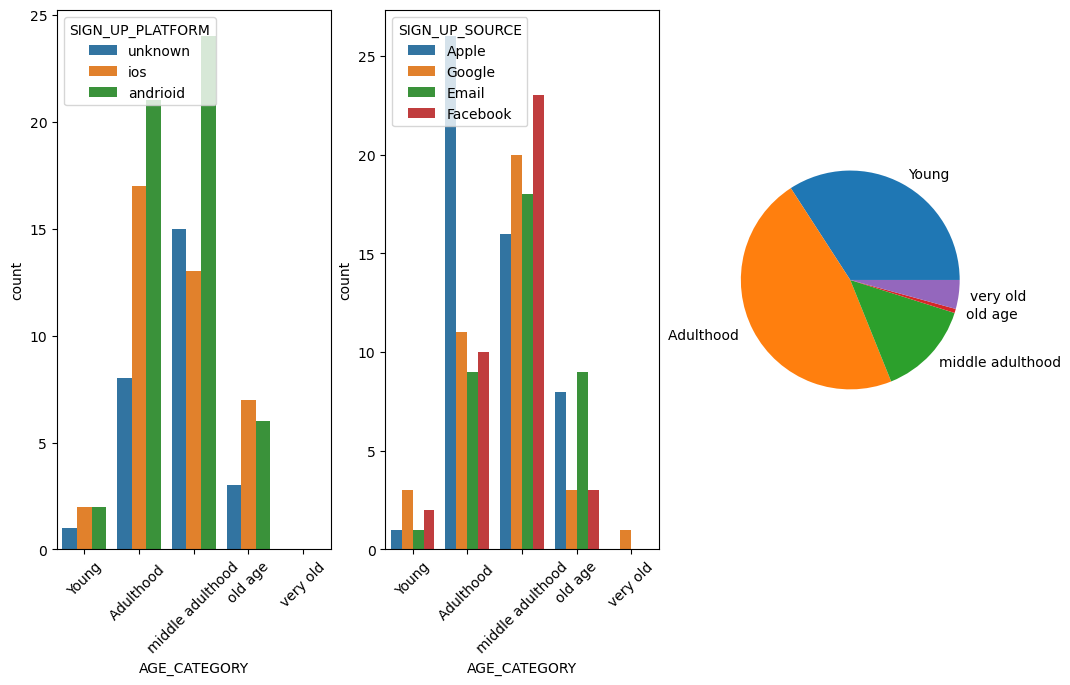

In [137]:
plt.figure(figsize = (12,7))

plt.subplot(1,3,1)
sns.countplot(data = user_age_focus, x = 'AGE_CATEGORY', hue = 'SIGN_UP_PLATFORM')
plt.xticks(rotation = 45)
plt.tight_layout

plt.subplot(1,3,2)
sns.countplot(data = user_age_focus, x = 'AGE_CATEGORY', hue = 'SIGN_UP_SOURCE')
plt.xticks(rotation = 45)
plt.tight_layout


plt.subplot(1,3,3)
age_count = np.array(list(Counter(user_age_focus['AGE_CATEGORY']).values()))
age_label = ['Young','Adulthood ','middle adulthood','old age','very old']
plt.pie(age_count, labels = age_label)
plt.show()

# EDA(receipts table)

#### Observations:
#### The data might need some cleaning because for some stores like Wendy's, the avergage price can't be over a thounsand dollars

### Averge cost of each store by descending order

In [161]:
receipt_spent_focus = receipt.copy()
receipt_spent_focus = receipt_spent_focus.dropna(subset = ['STORE_NAME','TOTAL_SPENT'])

def get_top_n_store(n):
    print(receipt_spent_focus.groupby(['STORE_NAME'])['TOTAL_SPENT'].mean().sort_values(ascending = False).head(n))
get_top_n_store(10)

STORE_NAME
H ARDEE'S FURNITURE A WAREHOUSE OF    10831.170000
CHASE                                  6817.692000
SMOKE CITY 1                           4307.550000
all point                              3804.030000
AMERICAS QUICKMART                     3747.800000
ZALES                                  2400.000000
BANK                                   2300.000000
Wendy’s                                2255.825000
BURLINGTON                             2172.521233
CASTIGLIA S ITALIAN RESTAURANT         2152.800000
Name: TOTAL_SPENT, dtype: float64


# EDA(receipt item table)

#### Observations:
#### similar to the receipt table, this table need some cleaning since one StarBucks coffee can't cost over 100,000

In [176]:
receipt_item = receipt_item.dropna(subset = ['TOTAL_FINAL_PRICE','QUANTITY_PURCHASED'])
receipt_item = receipt_item[receipt_item['QUANTITY_PURCHASED'] > 0]

In [177]:
receipt_item['EACH_PRICE'] = receipt_item['TOTAL_FINAL_PRICE']/receipt_item['QUANTITY_PURCHASED']

In [178]:
receipt_item.sort_values(['EACH_PRICE'], ascending=False)

,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE,EACH_PRICE
276511,62c646070a724909a71bc288,0,279af6e1bc75b0be1a550ebd7cf8e026,Starbucks Iced Coffee Premium Coffee Beverage ...,048500201831,STARBUCKS,1.0,31005.99,310059.9,STARBUCKS 21 OZ OR LARGER MULTISERVE,STRBOKS IC CF BL,2022-07-07T07:11:50.636Z,31005.99
193562,62c6300d0a72315a3e1b202e,0,deab389b6f6ecfef51d595ab07c40e51,Starbucks Iced Coffee Premium Coffee Beverage ...,048500201831,STARBUCKS,1.0,31005.99,310059.9,STARBUCKS 21 OZ OR LARGER MULTISERVE,STRBCKS IC CF BL,2022-07-07T07:11:50.648Z,31005.99
93589,62a155270a722e9a20080f55,9,c9dde33632067576c328e59bef67427d,Tomatoes on the Vine,4664,NaN,1.0,31003.84,NaN,NaN,1.93 LB @ $1.99/LB,2022-06-09T02:05:02.95Z,31003.84
261104,62cb3dca0a7236962e10fc3a,3,754e207ecefd9825693a913fda984f93,Fresh Iceberg Lettuce,40617,FRESH,1.0,31001.50,NaN,NaN,CELLO LETTUCE,2022-07-10T21:00:20.208Z,31001.50
261103,62cb3dca0a7236962e10fc3a,2,d15a30feb0a9633049f70a45d068a699,Fresh Iceberg Lettuce,40617,FRESH,1.0,31001.50,NaN,NaN,CELLO LETTUCE,2022-07-10T21:00:20.208Z,31001.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319283,61868ad50a7250292105d493,1,57ccdc76f1593a83c403e25c13b9c35d,RED FLAG,911112015533,NaN,1.0,0.00,NaN,NaN,RED FLAG,2021-11-06T14:02:11.583Z,0.00
319289,62e5567f0a724d047508a192,5,8d5a03c0d9fdce0c97c5e004c4806d16,1PCS/5PCS Beverage Can Lid Cap...,NaN,NaN,1.0,0.00,NaN,NaN,1PCS/5PCS Beverage Can Lid Cap...,2022-07-30T16:04:37.367Z,0.00
319297,62e5567f0a724d047508a192,13,d2acd9e537236393bfce5f060ef0397f,Spa Wrist Washband Microfiber ...,NaN,NaN,1.0,0.00,NaN,NaN,Spa Wrist Washband Microfiber ...,2022-07-30T16:04:37.367Z,0.00
319298,62e5567f0a724d047508a192,14,53cd1fee8aba99a69dc03f6832cef52c,Magic Microfiber Shower Cap To...,NaN,NaN,2.0,0.00,NaN,NaN,Magic Microfiber Shower Cap To...,2022-07-30T16:04:37.367Z,0.00
